In [1]:
# Import libries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import lightgbm as lgb
from scipy import stats
from matplotlib.gridspec import GridSpec
from collections import Counter
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification




In [33]:
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

In [2]:
# Import dataframes AND Specify a custom delimiter for the CSV input (sep=' ')

red_df=pd.read_csv(r'C:\Users\jspad\Documents\Code Academy\Data Bases\winequality-red.csv', sep=';')
white_df=pd.read_csv(r'C:\Users\jspad\Documents\Code Academy\Data Bases\winequality-white.csv',sep=';')

In [3]:
#creating new column

red_df['quality_label']= red_df['quality'].apply(lambda value: 'low' 
if value <= 5 else 'medium'
if value <=6 else 'high')

white_df['quality_label']= white_df['quality'].apply(lambda value: 'low' 
if value <= 5 else 'medium'
if value <=6 else 'high')



In [4]:
# transforming these labels into categrical data type

red_df['quality_label'] = pd.Categorical(red_df['quality_label'],
categories=['low', 'medium', 'high'])

white_df['quality_label'] = pd.Categorical(white_df['quality_label'],
categories=['low', 'medium', 'high'])

In [5]:
# Combine the two datasets into wines.

red_df['wine_type'] = 'red'
white_df['wine_type'] = 'white'

wines = pd.concat([red_df, white_df])

In [6]:
# Re-shuffle records just to randomize data points and Creat Index column
wines = wines.sample(frac=1, random_state=43).reset_index(drop=True)

wines['Id']=wines.index

wines


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,wine_type,Id
0,6.9,0.30,0.36,4.50,0.054,31.0,203.0,0.99513,3.40,0.57,10.4,4,low,white,0
1,9.0,0.40,0.43,2.40,0.068,29.0,46.0,0.99430,3.20,0.60,12.2,6,medium,red,1
2,7.6,0.17,0.45,11.20,0.054,56.0,137.0,0.99700,3.15,0.47,10.0,5,low,white,2
3,6.6,0.29,0.39,6.75,0.031,22.0,98.0,0.99130,3.15,0.80,12.9,7,high,white,3
4,6.1,0.28,0.22,1.80,0.034,32.0,116.0,0.98980,3.36,0.44,12.6,6,medium,white,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,5.0,0.33,0.18,4.60,0.032,40.0,124.0,0.99114,3.18,0.40,11.0,6,medium,white,6492
6493,6.4,0.24,0.31,2.80,0.038,41.0,114.0,0.99155,3.37,0.66,11.7,7,high,white,6493
6494,5.6,0.25,0.26,3.60,0.037,18.0,115.0,0.99040,3.42,0.50,12.6,6,medium,white,6494
6495,7.4,0.35,0.31,17.95,0.062,42.0,187.0,1.00020,3.27,0.64,9.1,5,low,white,6495


In [29]:
# Describe Labels

q_low=wines[wines['quality_label'] == 'low'].describe()
q_medium=wines[wines['quality_label'] == 'medium'].describe()
q_high=wines[wines['quality_label'] == 'high'].describe()

wines.describe()

comparative_labels= pd.concat([q_low.iloc[:, lambda df: [1, 3, 4, 5, 10]], q_medium.iloc[:, lambda df: [1, 3, 4, 5, 10]], q_high.iloc[:, lambda df: [1, 3, 4, 5, 10]]], axis='columns', keys=['Low', 'Medium', 'High'])

round(comparative_labels,2)



Low                                                        \
      volatile acidity residual sugar chlorides free sulfur dioxide  alcohol   
count          2384.00        2384.00   2384.00             2384.00  2384.00   
mean              0.40           5.65      0.06               29.48     9.87   
std               0.19           4.92      0.04               19.84     0.84   
min               0.10           0.60      0.01                2.00     8.00   
25%               0.26           1.80      0.04               14.00     9.30   
50%               0.34           2.90      0.05               26.00     9.60   
75%               0.50           8.52      0.08               42.00    10.40   
max               1.58          23.50      0.61              289.00    14.90   

                Medium                                                        \
      volatile acidity residual sugar chlorides free sulfur dioxide  alcohol   
count          2836.00        2836.00   2836.00             2836.00  2836.00   
mean              0.31           5.55      0.05               31.17    10.59   
std               0.15           4.89      0.03               16.84     1.13   
min               0.08           0.70      0.02                1.00     8.40   
25%               0.21           1.80      0.04               18.00     9.60   
50%               0.27           3.10      0.05               29.00    10.50   
75%               0.37           8.30      0.06               42.00    11.40   
max               1.04          65.80      0.42              112.00    14.00   

                  High                                                        
      volatile acidity residual sugar chlorides free sulfur dioxide  alcohol  
count          1277.00        1277.00   1277.00             1277.00  1277.00  
mean              0.29           4.83      0.04               31.06    11.43  
std               0.12           4.06      0.02               15.34     1.22  
min               0.08           0.80      0.01                3.00     8.50  
25%               0.20           1.80      0.03               20.00    10.70  
50%               0.27           2.90      0.04               31.00    11.50  
75%               0.34           6.50      0.05               40.00    12.40  
max               0.92          19.25      0.36              108.00    14.20

In [ ]:
# Variables plot

tmp = wines.iloc[:, lambda df: [1, 3, 4, 5, 10, 12, 14]].drop('Id', axis=1)
g = sns.pairplot(tmp, hue='quality_label', markers='+')
plt.show()

In [ ]:
# ML Model Setup

# Relevant Variables: 

# A. According Data Exploring:
#    1. Residual Sugar
#    X. Density - Rindondante
#    2. Alcohol
#    3. Free SO2

# B. According Modeling and Futures importance:(tutte tranne le rindondanti - Empirio insegna?)
#    1. Volatile acidity
#    2. Chlorides
#    3. Free sulfur dioxide
#    4. Alcohol
#    5. Residual Sugar



# Models:
# X. Linear Regretion
# 2. KNN - Nearest Neighbor Algorithms
# 3. Random Forest
# 4. Lightgbm Booster
# 5. Xg Booster(?)
# 6. NAIVE BAYES


# Treat Data:
# 1. Split data --> Train vs Test
# 2. Scale data: Robust scaler (with outliers) 
# 3. Scale data: Standard scaler
# 4. Scale data: MinMax scaler

# ML Application
# 1. Red/White Predition --> R/W
# 2. Label Prediction
# 3. Label RED Pred
# 4. Label White Pred
# X. Class Prediction ---> Bad idea!!


In [38]:
# 1. Split Data

# from sklearn.model_selection import train_test_split
# from collections import Counter

X = wines.iloc[:, lambda df: [1, 3, 4, 5, 10]]
var_names = X.columns
y = np.array(wines['wine_type'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=wines.wine_type)

print(Counter(y_train), Counter(y_test))
print('Features:', list(var_names))


Counter({'white': 4408, 'red': 1439}) Counter({'white': 490, 'red': 160})
Features: ['volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'alcohol']


In [62]:
# 2.1 Scale Data - Robust Scaler

from sklearn.preprocessing import RobustScaler

rs=RobustScaler()
X_train_rs = rs.fit_transform(X_train)
X_test_rs = rs.fit_transform(X_test)


In [42]:
# 2.2 Scale Data - Standard Scaler

from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_st = stdsc.fit_transform(X_train)
X_test_st = stdsc.transform(X_test)

In [58]:
# 2.3 Scale Data - MinMax Scaler 

from sklearn.preprocessing import MinMaxScaler

mms=MinMaxScaler()
X_train_mms = mms.fit_transform(X_train)
X_test_mms = mms.fit_transform(X_test)

In [77]:
# Model: lightgbm.Booster R/W

# from sklearn import metrics
# import lightgbm as lgb

X = wines.iloc[:,:-4]
var_names = X.columns
y = np.array(wines['wine_type'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=wines.wine_type)


rs=RobustScaler()

X_train = rs.fit_transform(X_train)
X_test = rs.fit_transform(X_test)


lgbmc = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-1,random_state=42, n_estimators=100)
lgbmc.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)])#, verbose=20,eval_metric='logloss')

pred_wines_rw_lgbmc= lgbmc.predict(X_test)

# print(Counter(y_train), Counter(y_test))
# print('Features:', list(var_names))
# # print(pred_wines_rw_lgbmc.shape)
# # print(y_test.shape)

# lgb.plot_importance(lgbmc)
# lgb.plot_metric(lgbmc)

# print(classification_report(y_test,pred_wines_rw_lgbmc, target_names=['red', 'white']))
# print(confusion_matrix(y_test,pred_wines_rw_lgbmc))
# print("Percentage of accurancy of the model with Cohen-Kappa score is: ", (cohen_kappa_score(y_test,pred_wines_rw_lgbmc))*100, "%")


[1]	training's binary_logloss: 0.4783	valid_0's binary_logloss: 0.47865
[2]	training's binary_logloss: 0.418976	valid_0's binary_logloss: 0.419549
[3]	training's binary_logloss: 0.3708	valid_0's binary_logloss: 0.371533
[4]	training's binary_logloss: 0.331292	valid_0's binary_logloss: 0.332496
[5]	training's binary_logloss: 0.297199	valid_0's binary_logloss: 0.298389
[6]	training's binary_logloss: 0.26798	valid_0's binary_logloss: 0.268928
[7]	training's binary_logloss: 0.242588	valid_0's binary_logloss: 0.243454
[8]	training's binary_logloss: 0.219903	valid_0's binary_logloss: 0.220198
[9]	training's binary_logloss: 0.20001	valid_0's binary_logloss: 0.200044
[10]	training's binary_logloss: 0.182166	valid_0's binary_logloss: 0.182232
[11]	training's binary_logloss: 0.1665	valid_0's binary_logloss: 0.166413
[12]	training's binary_logloss: 0.152519	valid_0's binary_logloss: 0.15242
[13]	training's binary_logloss: 0.140073	valid_0's binary_logloss: 0.140157
[14]	training's binary_logloss:

Counter({'white': 4408, 'red': 1439}) Counter({'white': 490, 'red': 160})
Features: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
(650,)
(650,)
              precision    recall  f1-score   support

         red       1.00      1.00      1.00       160
       white       1.00      1.00      1.00       490

    accuracy                           1.00       650
   macro avg       1.00      1.00      1.00       650
weighted avg       1.00      1.00      1.00       650

[[160   0]
 [  0 490]]
Cohen-Kappa score:  1.0
Training accuracy: 0.9997
Testing accuracy: 1.0000


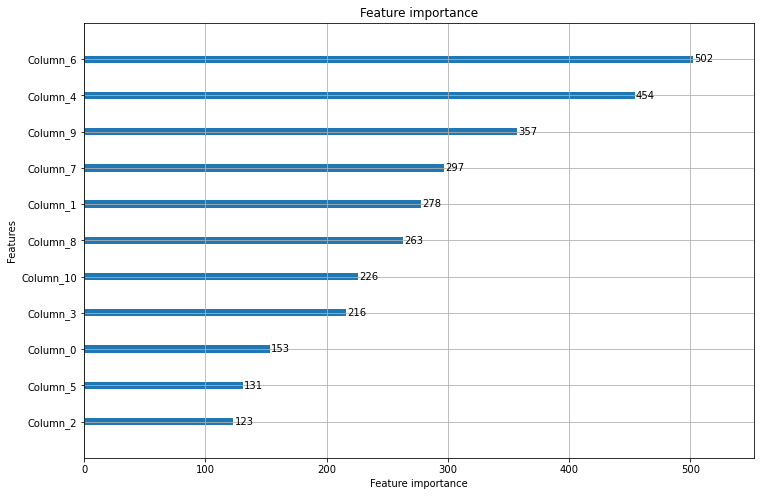

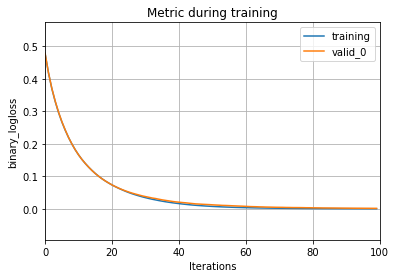

In [96]:
# Results Model LGBM Booster R/W

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

print(Counter(y_train), Counter(y_test))
print('Features:', list(var_names))

print(pred_wines_rw_lgbmc.shape)
print(y_test.shape)


# importances = pred_wines_rw_lgbmc.feature_importances_
# indices = np.argsort(importances)

lgb.plot_importance(lgbmc, max_num_features=40, figsize=(12,8))

# plt.barh(range(len(indices)), importances[indices], color='b', align='center')
# plt.yticks(range(len(indices)), [features[i] for i in indices])

# feature_imp = pd.DataFrame({'Value':lgbmc.feature_importance(),'Feature':X.columns})

# plt.figure(figsize=(20, 10))
# sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
# plt.title('LightGBM Features (avg over folds)')
# plt.tight_layout()
# plt.show()

#lgb.plot_tree(lgbmc,figsize=(30,40))
lgb.plot_metric(lgbmc)

print(metrics.classification_report(y_test,lgbmc.predict(X_test)))
print(confusion_matrix(y_test,pred_wines_rw_lgbmc))

print("Cohen-Kappa score: ", (cohen_kappa_score(y_test,pred_wines_rw_lgbmc)))
print('Training accuracy: {:.4f}'.format(lgbmc.score(X_train,y_train)))
print('Testing accuracy: {:.4f}'.format(lgbmc.score(X_test,y_test)))

In [ ]:
# Model: lightgbm.Booster Label

X = wines.iloc[:, lambda df: [1, 4, 5, 10]]#[:,:-3]
var_names = X.columns
y = np.array(wines['quality_label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=wines.quality_label)

rs=RobustScaler()

X_train = rs.fit_transform(X_train)
X_test = rs.fit_transform(X_test)


lgbmc = lgb.LGBMClassifier(learning_rate=0.09,max_depth=1000,random_state=42, n_estimators=35)
lgbmc.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)], verbose=20,eval_metric='logloss')

pred_wines_label_lgbmc= lgbmc.predict(X_test)



[20]	training's multi_logloss: 0.770419	valid_0's multi_logloss: 0.832311


C:\Users\jspad\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Counter({'medium': 2552, 'low': 2146, 'high': 1149}) Counter({'medium': 284, 'low': 238, 'high': 128})
Features: ['volatile acidity', 'chlorides', 'free sulfur dioxide', 'alcohol']
(650,)
(650,)
              precision    recall  f1-score   support

        high       0.63      0.44      0.52       128
         low       0.67      0.70      0.69       238
      medium       0.59      0.65      0.62       284

    accuracy                           0.63       650
   macro avg       0.63      0.60      0.61       650
weighted avg       0.63      0.63      0.63       650

[[ 56  14  58]
 [  2 167  69]
 [ 31  67 186]]
Cohen-Kappa score:  0.40480713699504545
Training accuracy: 0.6937
Testing accuracy: 0.6292


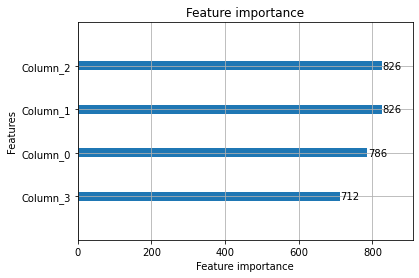

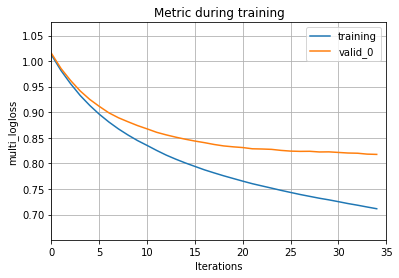

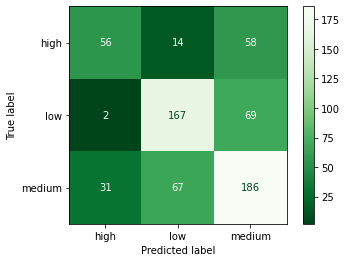

In [ ]:
#Results Model LGBM Booster Label

print(Counter(y_train), Counter(y_test))
print('Features:', list(var_names))

print(pred_wines_label_lgbmc.shape)
print(y_test.shape)

lgb.plot_importance(lgbmc)
lgb.plot_metric(lgbmc)
metrics.plot_confusion_matrix(lgbmc,X_test,y_test,cmap='Greens_r')
#lgb.plot_tree(lgbmc,figsize=(30,40))

print(metrics.classification_report(y_test,lgbmc.predict(X_test)))
print(confusion_matrix(y_test,pred_wines_label_lgbmc))

print("Cohen-Kappa score: ", (cohen_kappa_score(y_test,pred_wines_label_lgbmc)))
print('Training accuracy: {:.4f}'.format(lgbmc.score(X_train,y_train)))
print('Testing accuracy: {:.4f}'.format(lgbmc.score(X_test,y_test)))

In [ ]:
# Model: lightgbm.Booster Label RED

X = red_df.iloc[:, lambda df: [1, 4, 5, 10]]#[:,:-3]
var_names = X.columns
y = np.array(red_df['quality_label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=red_df.quality_label)

rs=RobustScaler()

X_train = rs.fit_transform(X_train)
X_test = rs.fit_transform(X_test)


lgbmc = lgb.LGBMClassifier(learning_rate=0.09,max_depth=10,random_state=42, n_estimators=30)
lgbmc.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)])#, verbose=20,eval_metric='logloss')

pred_red_label_lgbmc= lgbmc.predict(X_test)

[1]	training's multi_logloss: 0.940768	valid_0's multi_logloss: 0.959698
[2]	training's multi_logloss: 0.897734	valid_0's multi_logloss: 0.93278
[3]	training's multi_logloss: 0.860271	valid_0's multi_logloss: 0.908104
[4]	training's multi_logloss: 0.829128	valid_0's multi_logloss: 0.891039
[5]	training's multi_logloss: 0.802243	valid_0's multi_logloss: 0.875609
[6]	training's multi_logloss: 0.778831	valid_0's multi_logloss: 0.865374
[7]	training's multi_logloss: 0.757917	valid_0's multi_logloss: 0.856702
[8]	training's multi_logloss: 0.737781	valid_0's multi_logloss: 0.849706
[9]	training's multi_logloss: 0.719556	valid_0's multi_logloss: 0.842154
[10]	training's multi_logloss: 0.702783	valid_0's multi_logloss: 0.835882
[11]	training's multi_logloss: 0.687099	valid_0's multi_logloss: 0.8293
[12]	training's multi_logloss: 0.672878	valid_0's multi_logloss: 0.823829
[13]	training's multi_logloss: 0.658775	valid_0's multi_logloss: 0.819569
[14]	training's multi_logloss: 0.646214	valid_0's 

Counter({'low': 670, 'medium': 574, 'high': 195}) Counter({'low': 74, 'medium': 64, 'high': 22})
Features: ['volatile acidity', 'chlorides', 'free sulfur dioxide', 'alcohol']
(160,)
(160,)
              precision    recall  f1-score   support

        high       0.42      0.36      0.39        22
         low       0.66      0.80      0.72        74
      medium       0.58      0.47      0.52        64

    accuracy                           0.61       160
   macro avg       0.55      0.54      0.54       160
weighted avg       0.60      0.61      0.60       160

[[ 8  6  8]
 [ 1 59 14]
 [10 24 30]]
Cohen-Kappa score:  0.3397956510348442
Training accuracy: 0.8304
Testing accuracy: 0.6062


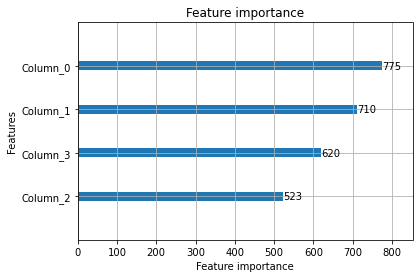

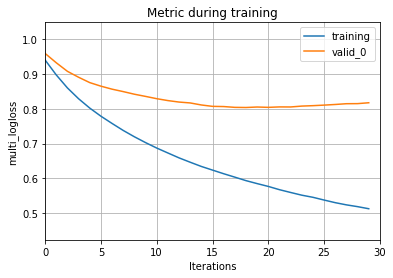

In [ ]:
#Results Model LGBM Booster Label RED

print(Counter(y_train), Counter(y_test))
print('Features:', list(var_names))

print(pred_red_label_lgbmc.shape)
print(y_test.shape)

lgb.plot_importance(lgbmc)
lgb.plot_metric(lgbmc)
#lgb.plot_tree(lgbmc,figsize=(30,40))

print(metrics.classification_report(y_test,lgbmc.predict(X_test)))
print(confusion_matrix(y_test,pred_red_label_lgbmc))

print("Cohen-Kappa score: ", (cohen_kappa_score(y_test,pred_red_label_lgbmc)))
print('Training accuracy: {:.4f}'.format(lgbmc.score(X_train,y_train)))
print('Testing accuracy: {:.4f}'.format(lgbmc.score(X_test,y_test)))

In [ ]:
# Model: lightgbm.Booster Label White

X = white_df.iloc[:, lambda df: [1, 3, 4, 5, 10]]#[:, lambda df: [3, 5, 7, 10]]#[:, lambda df: [1, 2, 3, 4, 5, 8, 9, 10]]#[:,:-3]##
var_names = X.columns
y = np.array(white_df['quality_label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=white_df.quality_label)

rs=RobustScaler()

X_train = rs.fit_transform(X_train)
X_test = rs.fit_transform(X_test)

lgbmc = lgb.LGBMClassifier(boosting_type='gbdt',learning_rate=0.09,max_depth=-1,random_state=42, n_estimators=20)
lgbmc.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)])#, verbose=20,eval_metric='logloss')

pred_white_label_lgbmc= lgbmc.predict(X_test)

[1]	training's multi_logloss: 1.01377	valid_0's multi_logloss: 1.0217
[2]	training's multi_logloss: 0.977924	valid_0's multi_logloss: 0.992494
[3]	training's multi_logloss: 0.947286	valid_0's multi_logloss: 0.969258
[4]	training's multi_logloss: 0.921018	valid_0's multi_logloss: 0.949
[5]	training's multi_logloss: 0.897853	valid_0's multi_logloss: 0.931152
[6]	training's multi_logloss: 0.877923	valid_0's multi_logloss: 0.91685
[7]	training's multi_logloss: 0.859588	valid_0's multi_logloss: 0.904314
[8]	training's multi_logloss: 0.841938	valid_0's multi_logloss: 0.89345
[9]	training's multi_logloss: 0.826655	valid_0's multi_logloss: 0.882725
[10]	training's multi_logloss: 0.813204	valid_0's multi_logloss: 0.87317
[11]	training's multi_logloss: 0.800481	valid_0's multi_logloss: 0.865859
[12]	training's multi_logloss: 0.788662	valid_0's multi_logloss: 0.859193
[13]	training's multi_logloss: 0.778023	valid_0's multi_logloss: 0.853698
[14]	training's multi_logloss: 0.767781	valid_0's multi_

Counter({'medium': 1758, 'low': 1312, 'high': 848}) Counter({'medium': 440, 'low': 328, 'high': 212})
Features: ['volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'alcohol']
(980,)
(980,)
              precision    recall  f1-score   support

        high       0.63      0.42      0.50       212
         low       0.69      0.62      0.65       328
      medium       0.57      0.70      0.63       440

    accuracy                           0.61       980
   macro avg       0.63      0.58      0.59       980
weighted avg       0.62      0.61      0.61       980

[[ 88   9 115]
 [  3 204 121]
 [ 49  83 308]]
Cohen-Kappa score:  0.3733509234828496
Training accuracy: 0.7070
Testing accuracy: 0.6122


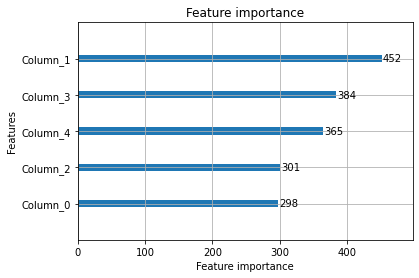

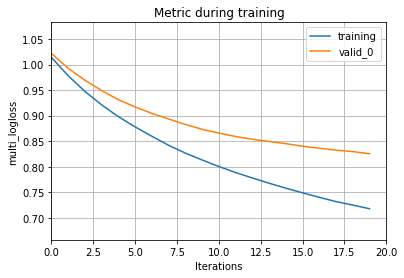

In [ ]:
#Results Model LGBM Booster Label White

print(Counter(y_train), Counter(y_test))
print('Features:', list(var_names))

print(pred_white_label_lgbmc.shape)
print(y_test.shape)

lgb.plot_importance(lgbmc)
lgb.plot_metric(lgbmc)
#lgb.plot_tree(lgbmc,figsize=(30,40))

print(metrics.classification_report(y_test,lgbmc.predict(X_test)))
print(confusion_matrix(y_test,pred_white_label_lgbmc))

print("Cohen-Kappa score: ", (cohen_kappa_score(y_test,pred_white_label_lgbmc)))
print('Training accuracy: {:.4f}'.format(lgbmc.score(X_train,y_train)))
print('Testing accuracy: {:.4f}'.format(lgbmc.score(X_test,y_test)))

In [ ]:
#pip install lightgbm

In [ ]:
#pip install scikit-optimize

In [ ]:
#%reset